<a href="https://www.bigdatauniversity.com"> <img src = "https://ibm.box.com/shared/static/jvcqp2iy2jlx2b32rmzdt0tx8lvxgzkp.png" width = 300, align = "center"> </a>
<h1 align = "center"> Funções de ativação </h1> <br>
As funções de ativação são a pedra angular do Aprendizagem Automática. Em geral, as Funções de Ativação definem como uma unidade de processamento tratará sua entrada - geralmente passando essa entrada através dela e gerando uma saída através de seu resultado. Para
Começar o processo de ter uma compreensão mais intuitiva, vamos passar por algumas das funções mais comumente usadas.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

A célula seguinte implementa uma função básica que traça uma superfície para uma função de ativação arbitrária. O gráfico é feito para todos os valores possíveis de peso e de polarização entre -0,5 e 0,5 com um passo de 0,05. A entrada, o peso e o viés são unidimensionais. Além disso, a entrada pode ser passada como um argumento.

In [2]:
def plot_act(i=1.0, actfunc=lambda x: x):
    ws = np.arange(-0.5, 0.5, 0.05)
    bs = np.arange(-0.5, 0.5, 0.05)

    X, Y = np.meshgrid(ws, bs)

    os = np.array([actfunc(tf.constant(w*i + b)).eval(session=sess) \
                   for w,b in zip(np.ravel(X), np.ravel(Y))])

    Z = os.reshape(X.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1)

<h3>Estrutura básica</h3>
Neste exemplo, ilustramos como, em Tensorflow, calcular a soma ponderada que vai para o neurônio e direcioná-lo para a função de ativação. Para mais detalhes, leia os comentários de código abaixo.

In [3]:
#start a session
sess = tf.Session();
#create a simple input of 3 real values
i = tf.constant([1.0, 2.0, 3.0], shape=[1, 3])
#create a matrix of weights
w = tf.random_normal(shape=[3, 3])
#create a vector of biases
b = tf.random_normal(shape=[1, 3])
#dummy activation function
def func(x): return x
#tf.matmul will multiply the input(i) tensor and the weight(w) tensor then sum the result with the bias(b) tensor.
act = func(tf.matmul(i, w) + b)
#Evaluate the tensor to a numpy array
act.eval(session=sess)

array([[-4.24217319, -4.34826994,  1.77794313]], dtype=float32)

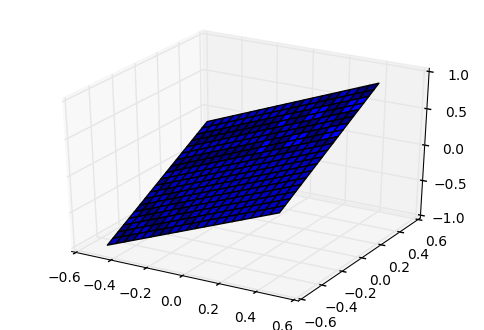

In [4]:
plot_act(1.0, func)

<a href="#ref1"> </a>
## As funções Step
A função Step foi a primeira projetada para algoritmos de aprendizado de máquina. Consiste numa função limiar simples que varia o valor Y de 0 a 1. Esta função tem sido historicamente utilizada para problemas de classificação, como regressão logística com duas classes.

<Img width = "250" alt = "Etapa binária de ativação" src = "https://ibm.box.com/shared/static/kqect7hdbnpzb6ylnauimr1uxmx5634k.png">

A função Step funciona simplesmente como um limitador. Cada entrada que passar por esta função será aplicada para recebe quer atribuído um valor de 0 ou 1. Como tal, é fácil ver como ele pode ser útil em problemas de classificação.

Há outras variações da função Step, como o Rectangle Step e outros, mas raramente são usados.

Tensorflow não tem uma função de passo.

<a href="#ref2"> </a>
## As funções Sigmoid
O próximo na linha para problemas de Aprendizado de Máquina é a família das funções sempre presentes de Sigmoid. As funções sigmoides são chamadas de que devido à sua forma no plano cartesiano, que se assemelha a uma forma "S".

As funções sigmóides são muito úteis no sentido de que eles "squash" seus dados dados em um intervalo limitado. Isso é excepcionalmente útil ao combinar essas funções com outras, como a função Step.

A maioria das funções Sigmóides que você deve encontrar em aplicações serão as funções Logística, Arctangente e Tangência Hiperbólica.

#### Regressão Logística (sigmóide)

A função Logística, como seu nome indica, é amplamente utilizada na Regressão Logística. É definido como $f(x) = \dfrac{1}{1 + e^{-x}}$. Efetivamente, isso faz com que você tenha um Sigmoid sobre o intervalo $ (0,1) $, assim:

<Img width = "384" alt = "Ativação - Etapa binária" src = "https://ibm.box.com/shared/static/eryl0bvmczgfzemarakzgvgvgwe0c135.png">

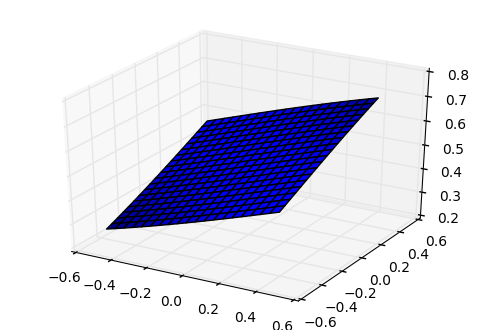

In [5]:
plot_act(1, tf.sigmoid)

3D sigmóide. O eixo x é o peso, o eixo y é o viés.

#### Usando sigmóide em uma camada de rede neural ####

In [7]:
act = tf.sigmoid(tf.matmul(i, w) + b)
act.eval(session=sess)

array([[ 0.05123722,  0.02440437,  0.93050784]], dtype=float32)

As funções Arctangente e Tangência Hiperbólica, por outro lado, como o nome sugere, são baseadas na função Tangente. Arctangente é definido por $ f (x) = tan ^ {- 1} x $, e produz um sigmóide sobre o intervalo $(\dfrac{-\pi}{2},\dfrac{\pi}{2})$.

<Img width = "384" alt = "Ativação - Atan" src = "https://ibm.box.com/shared/static/ajw9xtnsux7hc4fi5pghatwak425xk7f.png">

Não tem implementação em Tensorflow

#### Tanh

A Tangente Hiperbólica, ou Tanh, como é normalmente chamado, é definida como $f(x) = \dfrac{2}{1 + e^{-2x}} - 1$. Ele produz um sigmóide sobre o intervalo $ (- 1,1) $. Tanh é amplamente utilizado em uma ampla gama de aplicações, e é provavelmente a função mais utilizada da família sigmóide.

<Img width = "384" alt = "Ativação - TanH" src = "https://ibm.box.com/shared/static/ylr2so4fnhwszxnw9hfmar9rphy4qlpn.png">

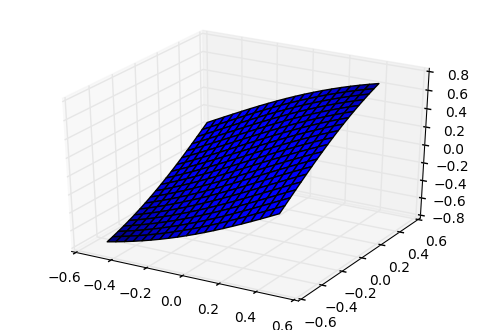

In [8]:
plot_act(1, tf.tanh)

3D tanh plot. O eixo x é o peso, o eixo y é o <i>bias</i>.

#### Usando tanh em uma camada de rede neural ####

In [9]:
act = tf.tanh(tf.matmul(i, w) + b)
act.eval(session=sess)

array([[-0.99824405,  0.38151383,  0.99905312]], dtype=float32)

<a href="#ref3"> </a>
## As funções da Unidade Linear
Unidades lineares são o próximo passo nas funções de ativação. Eles tomam conceitos de ambas as funções Step e Sigmoid e se comportam dentro do melhor dos dois tipos de funções. Unidades lineares em geral tendem a ser variação do que é chamado de unidade rectificada linear, ou ReLU.

O ReLU é uma função simples que opera dentro do intervalo $[0,\infty)$ . Para a totalidade do domínio de valor negativo, ele retorna um valor de 0, enquanto que no domínio de valor positivo, ele retorna $x$ para qualquer $f(x)$.

<Img width = "384" alt = "Ativação - ReLU" src = "https://ibm.box.com/shared/static/kblfxapmiioh20q6vmtd6qu579w689nz.png">

Embora possa parecer contra-intuitivo para utilizar uma função pseudo-linear em vez de algo como Sigmóides, ReLUs fornecer alguns benefícios que podem não ser entendidos à primeira vista. Por exemplo, durante o processo de inicialização de um modelo de rede neural, em que pesos são distribuídos aleatoriamente para cada unidade, ReLUs só irá ativar aproximadamente apenas em 50% das vezes - o que economiza algum poder de processamento. Além disso, a estrutura ReLU cuida do que é chamado de ** Desvanecimento e explosão gradiente ** problema por si só. Outro benefício - se não apenas marginalmente relevante para nós - é que este tipo de função de ativação é diretamente relacionado com a analogia do sistema nervoso de redes neurais (isso é chamado de * plausibilidade biológica *).

A estrutura ReLU também tem muitas variações otimizadas para certas aplicações, mas elas são implementadas caso a caso e, portanto, não estão no escopo deste notebook. Se você quiser saber mais, procure * Unidades Lineares Rectificadas Paramétricas * ou talvez * Unidades Exponenciais Lineares *.

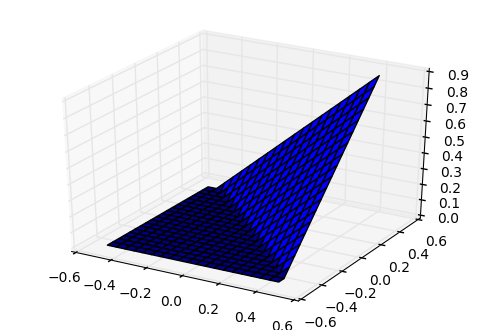

In [10]:
plot_act(1, tf.nn.relu)

3D relu parcela. O eixo x é o peso, o eixo y é o viés.

#### Usando relu em uma camada de rede neural ####

TensorFlow tem ReLU e algumas outras variantes desta função. Dê uma olhada:

In [11]:
act = tf.nn.relu(tf.matmul(i, w) + b)
act.eval(session=sess)

array([[ 3.14665246,  0.        ,  3.25419402]], dtype=float32)

Este é o final do bloco de notas ** Activation Functions **. Esperemos que agora você tenha uma compreensão mais profunda do que são funções de ativação e para que elas são usadas. Obrigado por ler este caderno, e boa sorte em seus estudos.
  Você pode ver todas as Funções de Ativação TensorFlow em [sua referência] (https://www.tensorflow.org/versions/r0.9/api_docs/python/nn.html#activation-functions).

### Thanks for completing this module!

Created by Walter Gomes de Amorim, Thiago Felipe Correa Borges and Hugo Sales Correa
